# 1 - Load the data file using pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data file
inp0=pd.read_csv("googleplaystore.csv")
inp0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2 - Check for null values in the data. Get the number of null values for each column

In [3]:
# Check for null values
inp0.isna().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3 - Drop records with nulls in any of the columns

In [4]:
# Drop null values
inp0=inp0.dropna()

In [5]:
inp0.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.1 - Variables seem to have incorrect type and inconsistent formatting. Fix them

In [6]:
inp0['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [7]:
def change(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else:
        return None

In [8]:
inp0['Size']=inp0['Size'].map(change)

In [9]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
inp0.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [11]:
inp0.Size.fillna(method='ffill',inplace=True)

In [12]:
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.2 - Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)

In [13]:
inp0['Reviews']=inp0['Reviews'].astype('int')

In [14]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 4.3 - Installs field is currently stored as string and has values like 1,000,000+

In [15]:
inp0['Installs']=inp0['Installs'].str.replace('[+,]','')

In [16]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
inp0['Installs']=inp0['Installs'].astype('int')

In [18]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 4.4 - Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric

In [19]:
inp0['Price']=inp0['Price'].str.replace('[$,]','')

In [20]:
inp0['Price']=inp0['Price'].astype('float')

In [21]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 5 - Sanity checks:
# 5.1 - Ratings should be between 1 and 5 only

In [22]:
inp0[inp0['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
inp0[inp0['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5.2 - Reviews should not be more than Installs

In [24]:
inp0[inp0.Reviews>inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [25]:
inp0.drop(inp0[inp0.Reviews>inp0.Installs].index,inplace=True)

In [26]:
inp0[inp0.Reviews>inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [27]:
inp0[(inp0.Type=="Free") & (inp0.Price!=0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5. Performing univariate analysis:

# Boxplot for Price

<AxesSubplot:xlabel='Price'>

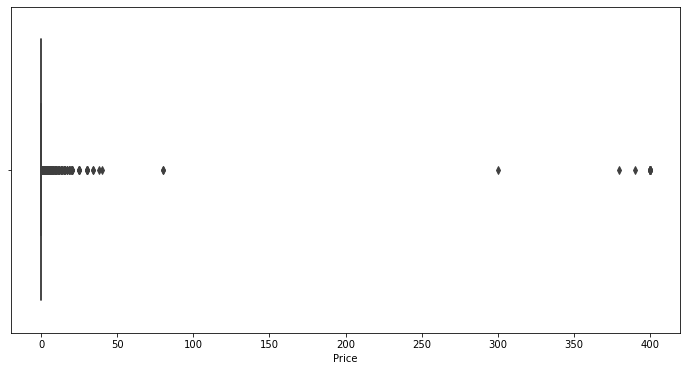

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(inp0.Price)

Lots of outliers found in boxplot for price

# Boxplot for Reviews

<AxesSubplot:xlabel='Reviews'>

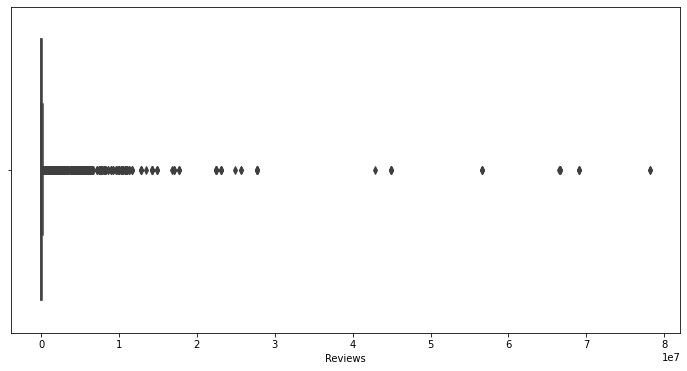

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(inp0.Reviews)

Some apps have a lot more reviews than others

# Histogram for Rating

<AxesSubplot:xlabel='Rating', ylabel='Count'>

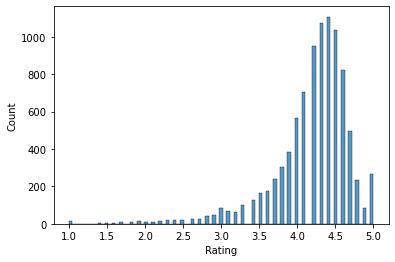

In [30]:
sns.histplot(inp0.Rating)

Left skewed, tending towards higher ratings

# Histogram for Size

<AxesSubplot:xlabel='Size', ylabel='Count'>

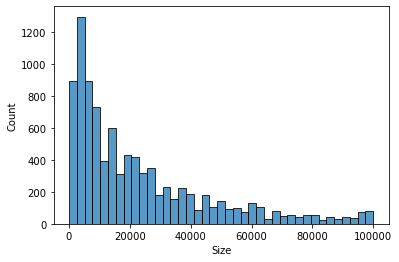

In [31]:
sns.histplot(inp0.Size)

Right skewed, majority of apps are smaller in size

# 6 - Outlier treatment:
# 6.1 Price: From the box plot, it seems like there are some apps with very high price.
# A price of $200 for an application on the Play Store is very high and suspicious!

In [32]:
# Outlier Treatment
inp0[inp0['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


200 is a very high price for apps and are most likely spam. Need to drop these records

In [33]:
np.unique(inp0.Price)

array([  0.  ,   0.99,   1.  ,   1.2 ,   1.29,   1.49,   1.5 ,   1.59,
         1.61,   1.7 ,   1.75,   1.76,   1.97,   1.99,   2.  ,   2.49,
         2.5 ,   2.56,   2.59,   2.9 ,   2.95,   2.99,   3.02,   3.04,
         3.08,   3.28,   3.49,   3.88,   3.9 ,   3.95,   3.99,   4.29,
         4.49,   4.59,   4.6 ,   4.77,   4.84,   4.99,   5.49,   5.99,
         6.49,   6.99,   7.49,   7.99,   8.49,   8.99,   9.  ,   9.99,
        10.  ,  10.99,  11.99,  12.99,  13.99,  14.  ,  14.99,  15.46,
        15.99,  16.99,  17.99,  18.99,  19.4 ,  19.99,  24.99,  29.99,
        33.99,  37.99,  39.99,  79.99, 299.99, 379.99, 389.99, 399.99,
       400.  ])

In [34]:
inp0.drop(inp0[inp0['Price']>=200].index,inplace=True)

In [35]:
np.unique(inp0.Price)

array([ 0.  ,  0.99,  1.  ,  1.2 ,  1.29,  1.49,  1.5 ,  1.59,  1.61,
        1.7 ,  1.75,  1.76,  1.97,  1.99,  2.  ,  2.49,  2.5 ,  2.56,
        2.59,  2.9 ,  2.95,  2.99,  3.02,  3.04,  3.08,  3.28,  3.49,
        3.88,  3.9 ,  3.95,  3.99,  4.29,  4.49,  4.59,  4.6 ,  4.77,
        4.84,  4.99,  5.49,  5.99,  6.49,  6.99,  7.49,  7.99,  8.49,
        8.99,  9.  ,  9.99, 10.  , 10.99, 11.99, 12.99, 13.99, 14.  ,
       14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4 , 19.99, 24.99,
       29.99, 33.99, 37.99, 39.99, 79.99])

In [36]:
inp0[inp0['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 6.1 - Reviews: Very few apps have very high number of reviews.
# These are all star apps that don’t help with the analysis and, in fact, will skew it.
# Drop records having more than 2 million reviews

In [37]:
inp0[inp0['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,3100.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,63000.0,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [38]:
inp0.drop(inp0[inp0['Reviews']>2000000].index,inplace=True)

In [39]:
inp0[inp0['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 6.2 Installs: There seems to be some outliers in this field too.
# Apps having very high number of installs should be dropped from the analysis

In [40]:
inp0.Installs.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [41]:
inp0=inp0[inp0.Installs < 10000000.0].copy()

In [42]:
np.unique(inp0.Price)

array([ 0.  ,  0.99,  1.  ,  1.2 ,  1.29,  1.49,  1.5 ,  1.59,  1.61,
        1.7 ,  1.75,  1.76,  1.97,  1.99,  2.  ,  2.49,  2.5 ,  2.56,
        2.59,  2.9 ,  2.95,  2.99,  3.02,  3.04,  3.08,  3.28,  3.49,
        3.88,  3.9 ,  3.95,  3.99,  4.29,  4.49,  4.59,  4.6 ,  4.77,
        4.84,  4.99,  5.49,  5.99,  6.49,  6.99,  7.49,  7.99,  8.49,
        8.99,  9.  ,  9.99, 10.  , 10.99, 11.99, 12.99, 13.99, 14.  ,
       14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4 , 19.99, 24.99,
       29.99, 33.99, 37.99, 39.99, 79.99])

# Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features

# Scatter plot for Rating vs. Price

<AxesSubplot:xlabel='Rating', ylabel='Price'>

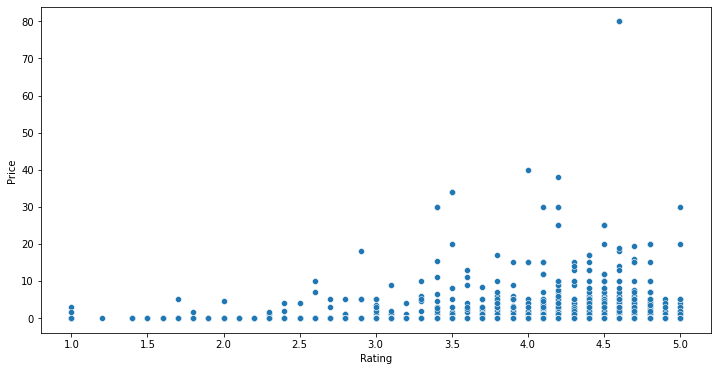

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot("Rating","Price",data=inp0)

Positively skewed relationship between rating and price

# Scatter plot for Rating vs. Size

<AxesSubplot:xlabel='Rating', ylabel='Size'>

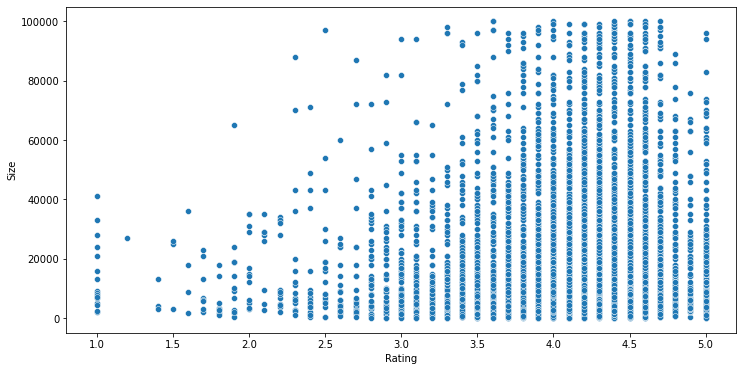

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot("Rating","Size",data=inp0)

Positively skewed relationship between rating and size

# Scatter plot for Rating vs. Reviews

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

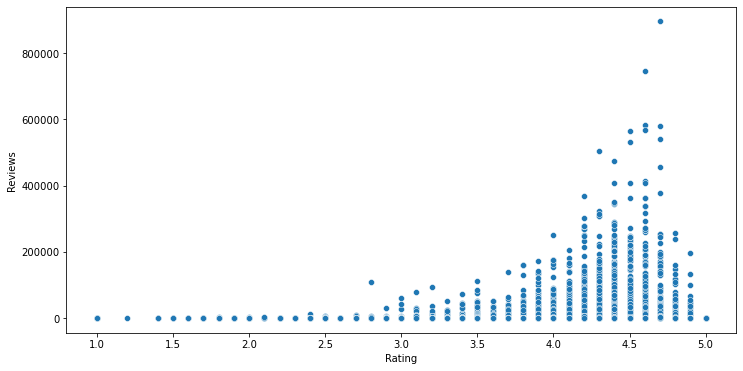

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot("Rating","Reviews",data=inp0)

Positively skewed relationship between rating and review

# Boxplot for Rating vs. Content Rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

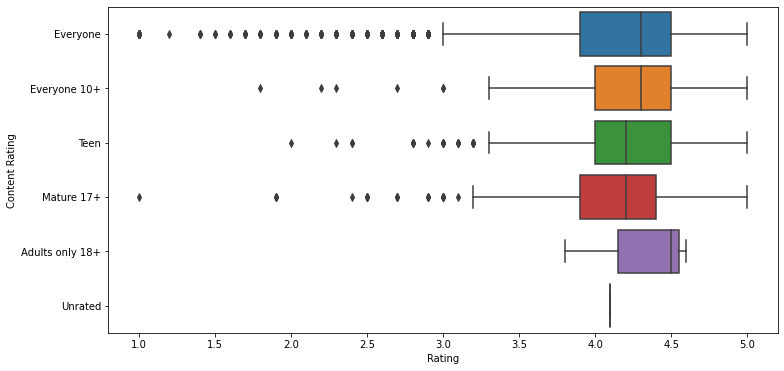

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot("Rating","Content Rating",data=inp0)

Adult only apps appear to have the best reviews

# Boxplot for Rating vs. Category

<AxesSubplot:xlabel='Rating', ylabel='Category'>

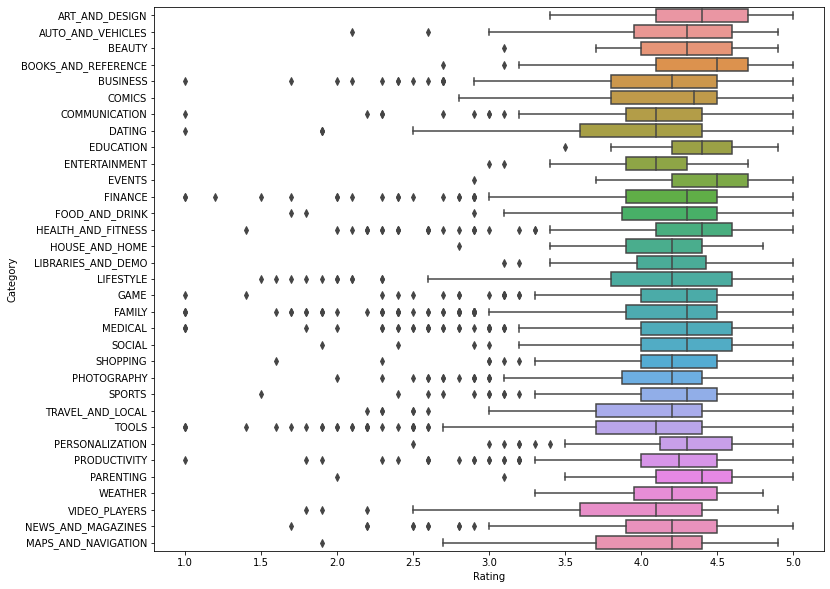

In [47]:
plt.figure(figsize=(12,10))
sns.boxplot("Rating","Category",data=inp0)

Events is the best rated category due to the upper quartile being higher than others

# 8-12 - Data preprocessing
Train Test Split, Linear Regression, Predictions on test set, R2

In [48]:
inp1=inp0.copy()

In [49]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [50]:
inp1['Reviews']=np.log1p(inp1['Reviews'])

In [51]:
inp1['Installs']=np.log1p(inp1['Installs'])

In [52]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [53]:
inp1.drop(columns = { 'App','Last Updated','Current Ver','Android Ver'},inplace=True)

In [54]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,3.806662,619.0,6.908755,Free,0.0,Everyone,Books & Reference
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education


In [55]:
dum_cols=['Category','Genres','Content Rating']
inp2=pd.get_dummies(inp1,columns=dum_cols,drop_first=True)
inp2

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,619.0,6.908755,Free,0.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
inp2.pop('Type')

0        Free
1        Free
2        Free
4        Free
5        Free
         ... 
10833    Free
10834    Free
10836    Free
10837    Free
10839    Free
Name: Type, Length: 7258, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2,train_size=0.7,random_state=100)

In [58]:
y_train=df_train.pop("Rating")
x_train=df_train

y_test=df_test.pop("Rating")
x_test=df_test

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import r2_score
y_train_pred= lr.predict(x_train)
r2_score(y_train, y_train_pred)

0.1443569009896155

In [61]:
y_test_pred= lr.predict(x_test)
r2_score(y_test, y_test_pred)

0.13545083193996932